# import  Data

This excercise was created in attempt to understand Kmeans clustering algorithm along with it. I learned how to built Kmean from scratch  and understand it working principal

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
import numpy as np

In [2]:
data=load_digits()

In [3]:
print(data['data'].shape)
images=data['data']
labels=data['target']

(1797, 64)


In [4]:
img_df = pd.DataFrame()
for i in range(64):
    img_df[f'Pixel{i}']=images[:,i]
img_df.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel54,Pixel55,Pixel56,Pixel57,Pixel58,Pixel59,Pixel60,Pixel61,Pixel62,Pixel63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# Preprocess The Data

In [5]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
scaled_df=Scaler.fit_transform(img_df)
scaled_df

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

# Fit A Model

In [6]:
from sklearn.cluster import KMeans
elbow={'inertia':[],'cluster':[]}
for i in range(2,15):
    model=KMeans(i)
    elbow['cluster'].append(i)
    model.fit(scaled_df)
    elbow['inertia'].append(model.inertia_)

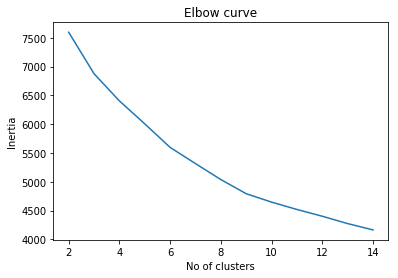

In [7]:
plt.plot(elbow['cluster'],elbow['inertia'])
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [8]:
model=KMeans(10)
model.fit_transform(scaled_df)

array([[2.81455371, 0.87742692, 2.44964565, ..., 2.91895349, 2.91804921,
        2.45959351],
       [1.59105112, 3.39846312, 2.55261673, ..., 2.25375737, 2.39819704,
        2.7234074 ],
       [1.94820968, 3.00576252, 3.11429481, ..., 2.48044311, 2.51401046,
        2.85184387],
       ...,
       [1.59820014, 2.81396916, 2.63967404, ..., 2.61642926, 2.44793141,
        2.74067468],
       [2.59050978, 2.17332987, 2.5459815 , ..., 2.18714406, 2.82203073,
        2.20786744],
       [2.14627634, 2.58791895, 2.70879358, ..., 2.85526913, 2.32421818,
        2.2959883 ]])

# visualisation of data

In [9]:
from sklearn.manifold import TSNE
tsne=TSNE(2)
sel_feature=tsne.fit_transform(scaled_df)

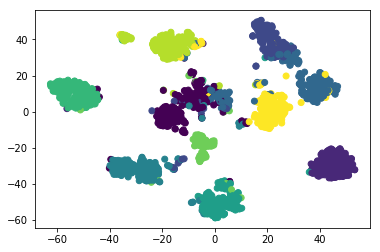

In [10]:
plt.scatter(sel_feature[:,0],sel_feature[:,1],c=model.labels_)

In [20]:
from  bokeh.io import output_notebook
from bokeh.plotting import figure,output_file,show
#output_notebook()
output_file("Mnist.html")

In [21]:
def mscatter(p, x, y):
    colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(x**2-y**2,x**2-y**2)# just to give color
    ]
    p.scatter(x, y, marker="circle", size=15,
            color=colors)

In [24]:
p=figure(title="Mnist Cluster",plot_width=400,plot_height=450)
traces=[] 
for i in range(10):  
    mask=model.labels_==i
    mscatter(p,sel_feature[:,0],sel_feature[:,1])
#show(p)

# Built A Model from Scratch

In [15]:
class K_mean():
    def __init__(self,k=3, tolerance=0.0001, max_iterations=500):
        self.k=k
        self.tolerance=tolerance
        self.max_iterations=max_iterations
    def fit(self,data):
        self.centroid={}
        for i in range(self.k):
            self.centroid[i]=data[i]
        for i  in range(self.max_iterations):
            self.classes={}
            for j in range(self.k):
                self.classes[j]=[]
            for feature in data:
                distances=[np.linalg.norm(feature-self.centroid[centre]) for centre in range(self.k)]
                classification = distances.index(min(distances))
                self.classes[classification].append(feature)
            prev=dict(self.centroid)
            for centre in self.classes:
                self.centroid[centre]=np.average(self.classes[centre],axis=0)
            isOptimal = True

            for centre in self.centroid:
                original_centroid = prev[centre]
                curr = self.centroid[centre]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break
    def pred(feature):
        distance=[np.linalg.norm(feature-self.centroid[centre])
                   for centre in range(self.k)]
        classified=distances.index(min(distances))
        return classified


In [16]:
scratch_model=K_mean(k=10)

In [17]:
scratch_model.fit(sel_feature)

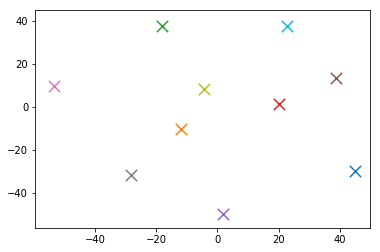

In [18]:
#centroid on plot
for centroid in scratch_model.centroid:
    plt.scatter(scratch_model.centroid[centroid][0], scratch_model.centroid[centroid][1], s = 130, marker = "x")

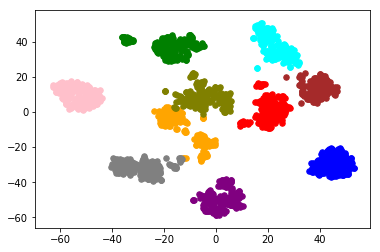

In [19]:
#cluster on plot
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for classification in scratch_model.classes:
    color = colors[classification]
    for features in scratch_model.classes[classification]:
        plt.scatter(features[0], features[1],color = color,s = 30)